In [83]:
import plt_compat as plt
import pandas as pd

In [84]:
df = pd.read_csv('Titanic_train.csv')
df.info()
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
df.describe(include = object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [88]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [89]:
df_encoded = pd.get_dummies(df)
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,True,False,False,True
887,1,1,19.0,0,0,30.0000,True,False,False,False,True
888,0,3,NaN,1,2,23.4500,True,False,False,False,True
889,1,1,26.0,0,0,30.0000,False,True,True,False,False


In [90]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.081720
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.166603
Sex_female,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.496624


In [91]:
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

fig = px.imshow(correlation_matrix,text_auto=True,color_continuous_scale="RdBu_r",title="Correlation Map")
fig.update_layout(width=900,height=700)
fig.show()


In [92]:
df_encoded.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [93]:
mean_age = df['Age'].mean()
mean_age

np.float64(29.69911764705882)

In [94]:
df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].mean())
df_encoded['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [95]:
df_encoded['Age'].isnull().sum()

np.int64(0)

In [96]:
print('Unique values in categorical columns')
for col in ['Sex','Embarked']:
    print(f"{col}:{df[col].unique()}")

Unique values in categorical columns
Sex:['male' 'female']
Embarked:['S' 'C' 'Q' nan]


In [97]:
numerical_features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
df[numerical_features].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
fig = px.box(df,x="Survived",y="Pclass",color="Survived", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="Pclass distribution by Survived",xaxis_title="Survived (0 = Not Survived, 1 = Survived)",yaxis_title="Pclass",width=1000,height=500)
fig.show()

In [99]:
fig = px.histogram(df,x="Sex",color="Survived",  barmode="group",  color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="Survival Rate by Sex",xaxis_title="Sex",yaxis_title="Number of Passengers",legend_title_text="Survived",width=1000,height=500)
fig.for_each_trace(lambda t: t.update(name="Not Survived" if t.name == "0" else "Survived"))
fig.show()


In [100]:
#box plot for age vs churn
fig = px.box(df,x="Survived",y="Age",color="Survived")
fig.update_layout(title="Age distribution by Survival status",xaxis_title="Survival (0 = Not Survived, 1 = Survived)",yaxis_title="Age",width=1000,height=500)


In [101]:
lower_outliers = df['Age'].quantile(0.05)
higher_outliers = df['Age'].quantile(0.95)
df['Age'] = np.where(df['Age'] < lower_outliers, lower_outliers,
             np.where(df['Age'] > higher_outliers, higher_outliers, df['Age']))


In [102]:
fig = px.box(df,x="Survived",y="Age",color="Survived", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="Age distribution by Survival status",xaxis_title="Survival (0 = Not Survived, 1 = Survived)",yaxis_title="Age",width=1000,height=500)

In [103]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()
print(mean_age)
print(std_age)


29.44047619047619
13.523898136661371


In [104]:
z_threshold = 3
upper_limit = mean_age + z_threshold * std_age
lower_limit = mean_age - z_threshold * std_age
for i in range(len(df)):
    if df.loc[i, 'Age'] < lower_limit:
        df.loc[i, 'Age'] = lower_limit
    elif df.loc[i, 'Age'] > upper_limit:
        df.loc[i, 'Age'] = upper_limit
fig = px.box(df,x="Survived",y="Age",color="Survived",color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="Age distribution by Survival status",xaxis_title="Survival (0 = Not Survived, 1 = Survived)",yaxis_title="Age",width=1000,height=500)

<Axes: xlabel='Pclass', ylabel='Survived'>

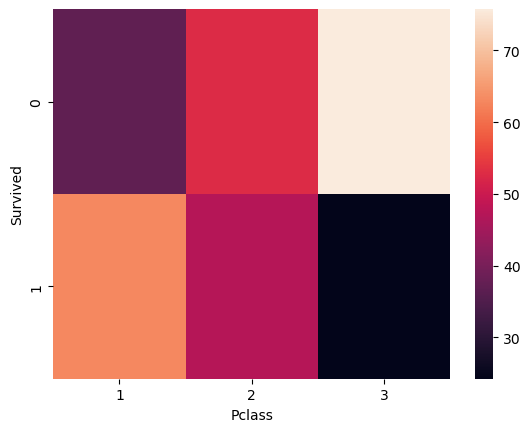

In [105]:
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns') * 100)


In [106]:
df_encoded['Family size'] = df['SibSp'] + df['Parch'] + 1
df_encoded['Family size'].value_counts()
df_encoded.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [107]:
def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num >1 and num <5:
        return 'small'
    else:
        return 'large'

In [108]:
import pandas as pd
df_encoded['Family_type'] = df_encoded['Family size'].apply(transform_family_size)
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size,Family_type
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True,2,small
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False,2,small
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True,1,alone
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True,2,small
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True,1,alone
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True,1,alone
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True,4,small
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False,1,alone


In [109]:
import pandas as pd
counts = df_encoded[['Embarked_C', 'Embarked_Q', 'Embarked_S']].sum()

fig = px.bar(counts,x=counts.index,y=counts.values,text=counts.values,color_discrete_sequence=["skyblue"])
fig.update_layout(title="Passenger count by Embarked port",xaxis_title="Embarked",yaxis_title="Count",width=800,height=500)
fig.show()

In [110]:
fig = px.pie(names=counts.index,values=counts.values,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title="Passenger count by Embarked port",width=800,height=500)
fig.show()

<Axes: >

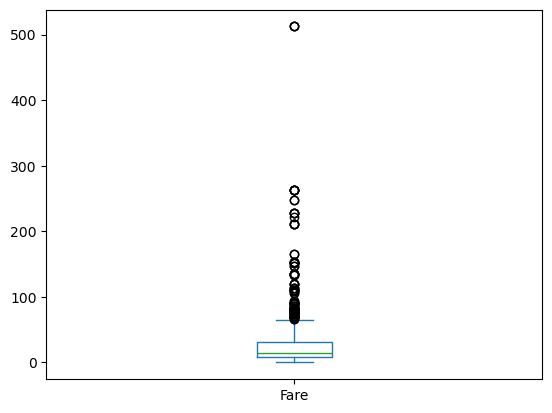

In [111]:
df_encoded['Fare'].plot(kind='box')

In [112]:
df_encoded['individual_fare'] = df_encoded['Fare']/(df_encoded['SibSp'] + df_encoded['Parch'] + 1)
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size,Family_type,individual_fare
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True,2,small,3.62500
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False,2,small,35.64165
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True,1,alone,7.92500
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True,2,small,26.55000
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True,1,alone,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True,1,alone,13.00000
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True,1,alone,30.00000
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True,4,small,5.86250
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False,1,alone,30.00000


<Axes: >

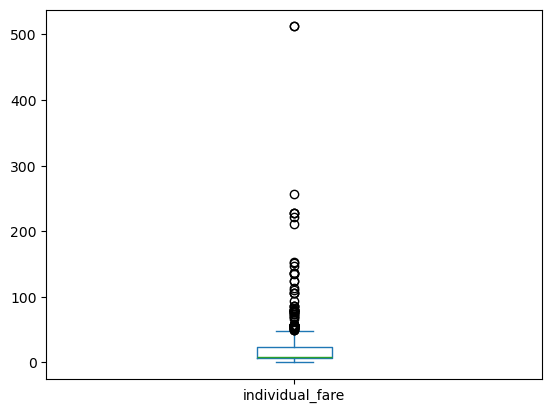

In [113]:
df_encoded['individual_fare'].plot(kind='box')

In [114]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(df_encoded['individual_fare'])
mean_fare = df_encoded['individual_fare'].mean()

outliers = (np.abs(z_scores) > 3)
df_encoded.loc[outliers, 'individual_fare'] = mean_fare
df_encoded


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size,Family_type,individual_fare
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True,2,small,3.62500
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False,2,small,35.64165
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True,1,alone,7.92500
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True,2,small,26.55000
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True,1,alone,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True,1,alone,13.00000
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True,1,alone,30.00000
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True,4,small,5.86250
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False,1,alone,30.00000


In [115]:
x = df_encoded.drop(['SibSp','Parch','Survived','Family_type'],axis=1)
y=df_encoded['Survived']

In [116]:
X = pd.get_dummies(x,drop_first=True)
print(X.isnull().sum())

Pclass             0
Age                0
Fare               0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Family size        0
individual_fare    0
dtype: int64


In [117]:
from sklearn.preprocessing import StandardScaler
X=x
num_cols = ['Pclass', 'Age', 'individual_fare', 'Family size']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [119]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=1000)

In [120]:
logr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [121]:
df1 = pd.read_csv('Titanic_test.csv')
df1.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [123]:
df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [124]:
df1_encoded = pd.get_dummies(df1)
df1_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,False,True,False,False,True
414,1,39.0,0,0,108.9000,True,False,True,False,False
415,3,38.5,0,0,7.2500,False,True,False,False,True
416,3,NaN,0,0,8.0500,False,True,False,False,True


In [125]:
df1_encoded['Age'] = df1_encoded['Age'].fillna(df1_encoded['Age'].mean())
df1_encoded['Age']

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [126]:
df1_encoded['Age'].isnull().sum()

np.int64(0)

In [127]:
correlation_m1 = df1_encoded.corr()
correlation_m1

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.440782,0.001087,0.018721,-0.577147,-0.108615,0.108615,-0.318543,0.252608,0.120783
Age,-0.440782,1.000000,-0.079535,-0.045073,0.329071,-0.000011,0.000011,0.161612,-0.012719,-0.136822
SibSp,0.001087,-0.079535,1.000000,0.306895,0.171539,0.099943,-0.099943,-0.016365,-0.098824,0.079367
Parch,0.018721,-0.045073,0.306895,1.000000,0.230046,0.159120,-0.159120,-0.005791,-0.132948,0.092201
Fare,-0.577147,0.329071,0.171539,0.230046,1.000000,0.191514,-0.191514,0.312161,-0.155562,-0.178582
Sex_female,-0.108615,-0.000011,0.099943,0.159120,0.191514,1.000000,-1.000000,0.033684,0.115574,-0.105883
Sex_male,0.108615,0.000011,-0.099943,-0.159120,-0.191514,-1.000000,1.000000,-0.033684,-0.115574,0.105883
Embarked_C,-0.318543,0.161612,-0.016365,-0.005791,0.312161,0.033684,-0.033684,1.000000,-0.199786,-0.767375
Embarked_Q,0.252608,-0.012719,-0.098824,-0.132948,-0.155562,0.115574,-0.115574,-0.199786,1.000000,-0.474962
Embarked_S,0.120783,-0.136822,0.079367,0.092201,-0.178582,-0.105883,0.105883,-0.767375,-0.474962,1.000000


In [128]:
df1_encoded['Family size'] = df1_encoded['SibSp'] + df1_encoded['Parch'] + 1
df1_encoded['Family size'].value_counts()
df1_encoded.describe()

,Pclass,Age,SibSp,Parch,Fare,Family size
count,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,1.839713
std,0.841838,12.634534,0.896760,0.981429,55.907576,1.519072
min,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,30.272590,0.000000,0.000000,14.454200,1.000000
75%,3.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,11.000000


In [129]:
import pandas as pd
df1_encoded['Family_type'] = df1_encoded['Family size'].apply(transform_family_size)
df1_encoded

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size,Family_type
0,3,34.50000,0,0,7.8292,False,True,False,True,False,1,alone
1,3,47.00000,1,0,7.0000,True,False,False,False,True,2,small
2,2,62.00000,0,0,9.6875,False,True,False,True,False,1,alone
3,3,27.00000,0,0,8.6625,False,True,False,False,True,1,alone
4,3,22.00000,1,1,12.2875,True,False,False,False,True,3,small
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,False,True,False,False,True,1,alone
414,1,39.00000,0,0,108.9000,True,False,True,False,False,1,alone
415,3,38.50000,0,0,7.2500,False,True,False,False,True,1,alone
416,3,30.27259,0,0,8.0500,False,True,False,False,True,1,alone


In [130]:
x1 = df1_encoded.drop(['SibSp','Parch','Family_type'],axis=1)
print(x1)

     Pclass       Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3  34.50000    7.8292       False      True       False        True   
1         3  47.00000    7.0000        True     False       False       False   
2         2  62.00000    9.6875       False      True       False        True   
3         3  27.00000    8.6625       False      True       False       False   
4         3  22.00000   12.2875        True     False       False       False   
..      ...       ...       ...         ...       ...         ...         ...   
413       3  30.27259    8.0500       False      True       False       False   
414       1  39.00000  108.9000        True     False        True       False   
415       3  38.50000    7.2500       False      True       False       False   
416       3  30.27259    8.0500       False      True       False       False   
417       3  30.27259   22.3583       False      True        True       False   

     Embarked_S  Family siz

In [131]:
mean_age = x1['Age'].mean()
std_age = x1['Age'].std()
print(mean_age)
print(std_age)

30.272590361445783
12.63453416832505


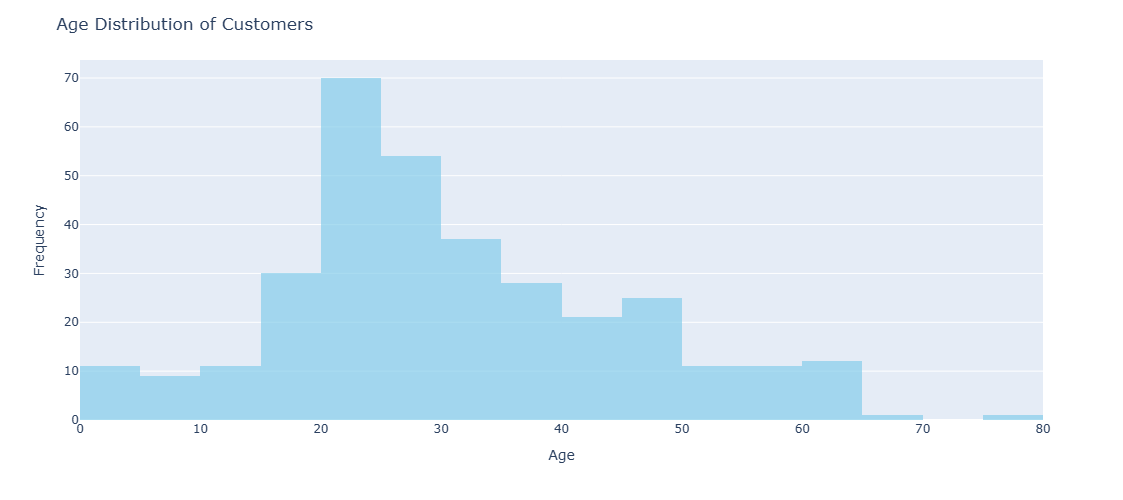

In [132]:
fig = px.histogram(df1,x="Age",nbins=30,color_discrete_sequence=["skyblue"])
fig.update_traces(opacity=0.7)
fig.update_layout(title="Age Distribution of Customers",xaxis_title="Age",yaxis_title="Frequency",width=1000,height=500)
fig.show()

In [133]:
mean_age = df1_encoded['Age'].mean()
std_age = df1_encoded['Age'].std()
z_threshold = 3

upper_limit = mean_age + z_threshold * std_age
lower_limit = mean_age - z_threshold * std_age

df1_encoded['Age'] = df1_encoded['Age'].clip(lower=lower_limit, upper=upper_limit)
x1=df1_encoded
print(x1)


     Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0         3  34.50000      0      0    7.8292       False      True   
1         3  47.00000      1      0    7.0000        True     False   
2         2  62.00000      0      0    9.6875       False      True   
3         3  27.00000      0      0    8.6625       False      True   
4         3  22.00000      1      1   12.2875        True     False   
..      ...       ...    ...    ...       ...         ...       ...   
413       3  30.27259      0      0    8.0500       False      True   
414       1  39.00000      0      0  108.9000        True     False   
415       3  38.50000      0      0    7.2500       False      True   
416       3  30.27259      0      0    8.0500       False      True   
417       3  30.27259      1      1   22.3583       False      True   

     Embarked_C  Embarked_Q  Embarked_S  Family size Family_type  
0         False        True       False            1       alone  
1         Fal

<Axes: >

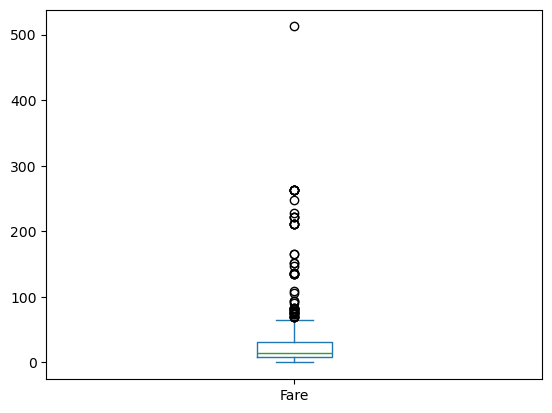

In [134]:
df1_encoded['Fare'].plot(kind='box')

In [135]:
num_cols1 = ['Pclass', 'Age', 'Fare', 'Family size']

scaler = StandardScaler()
X[num_cols1] = scaler.fit_transform(X[num_cols1])   
x1[num_cols1] = scaler.transform(x1[num_cols1])     


In [136]:
print(x1)

     Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0       3.0  34.50000      0      0 -0.490783       False      True   
1       3.0  47.00000      1      0 -0.507479        True     False   
2       2.0  62.00000      0      0 -0.453367       False      True   
3       3.0  27.00000      0      0 -0.474005       False      True   
4       3.0  22.00000      1      1 -0.401017        True     False   
..      ...       ...    ...    ...       ...         ...       ...   
413     3.0  30.27259      0      0 -0.486337       False      True   
414     1.0  39.00000      0      0  1.544246        True     False   
415     3.0  38.50000      0      0 -0.502445       False      True   
416     3.0  30.27259      0      0 -0.486337       False      True   
417     3.0  30.27259      1      1 -0.198244       False      True   

     Embarked_C  Embarked_Q  Embarked_S  Family size Family_type  
0         False        True       False          1.0       alone  
1         Fal

In [137]:
fare_mean = x1['Fare'].mean()
fare_mean

np.float64(0.06892064202873327)

In [138]:
x1['Fare'] = x1['Fare'].fillna(fare_mean)

In [139]:
x1 = df1_encoded.drop(['SibSp','Parch','Family_type'],axis=1)
print(x1)

     Pclass       Age      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0       3.0  34.50000 -0.490783       False      True       False        True   
1       3.0  47.00000 -0.507479        True     False       False       False   
2       2.0  62.00000 -0.453367       False      True       False        True   
3       3.0  27.00000 -0.474005       False      True       False       False   
4       3.0  22.00000 -0.401017        True     False       False       False   
..      ...       ...       ...         ...       ...         ...         ...   
413     3.0  30.27259 -0.486337       False      True       False       False   
414     1.0  39.00000  1.544246        True     False        True       False   
415     3.0  38.50000 -0.502445       False      True       False       False   
416     3.0  30.27259 -0.486337       False      True       False       False   
417     3.0  30.27259 -0.198244       False      True        True       False   

     Embarked_S  Family siz

In [140]:
x1['individual_fare'] = df1_encoded['Fare']/(df1_encoded['SibSp'] + df1_encoded['Parch'] + 1)
x1

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size,individual_fare
0,3.0,34.50000,-0.490783,False,True,False,True,False,1.0,-0.490783
1,3.0,47.00000,-0.507479,True,False,False,False,True,2.0,-0.253739
2,2.0,62.00000,-0.453367,False,True,False,True,False,1.0,-0.453367
3,3.0,27.00000,-0.474005,False,True,False,False,True,1.0,-0.474005
4,3.0,22.00000,-0.401017,True,False,False,False,True,3.0,-0.133672
...,...,...,...,...,...,...,...,...,...,...
413,3.0,30.27259,-0.486337,False,True,False,False,True,1.0,-0.486337
414,1.0,39.00000,1.544246,True,False,True,False,False,1.0,1.544246
415,3.0,38.50000,-0.502445,False,True,False,False,True,1.0,-0.502445
416,3.0,30.27259,-0.486337,False,True,False,False,True,1.0,-0.486337


<Axes: >

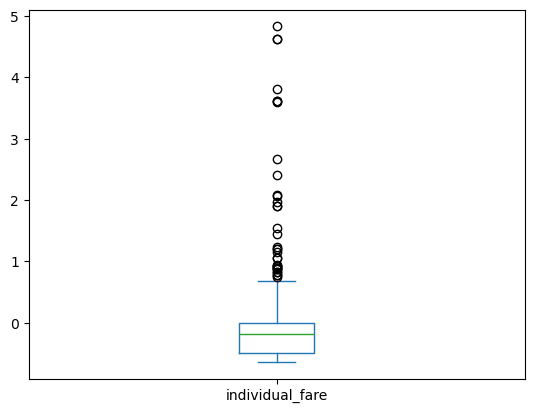

In [141]:
x1['individual_fare'].plot(kind='box')

In [142]:
from scipy import stats
import numpy as np

z_testscores = stats.zscore(x1['individual_fare'])
mean_individualfare = x1['individual_fare'].mean()

outliers = (np.abs(z_testscores) > 3)
x1.loc[outliers, 'individual_fare'] = mean_individualfare
x1


,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size,individual_fare
0,3.0,34.50000,-0.490783,False,True,False,True,False,1.0,-0.490783
1,3.0,47.00000,-0.507479,True,False,False,False,True,2.0,-0.253739
2,2.0,62.00000,-0.453367,False,True,False,True,False,1.0,-0.453367
3,3.0,27.00000,-0.474005,False,True,False,False,True,1.0,-0.474005
4,3.0,22.00000,-0.401017,True,False,False,False,True,3.0,-0.133672
...,...,...,...,...,...,...,...,...,...,...
413,3.0,30.27259,-0.486337,False,True,False,False,True,1.0,-0.486337
414,1.0,39.00000,1.544246,True,False,True,False,False,1.0,1.544246
415,3.0,38.50000,-0.502445,False,True,False,False,True,1.0,-0.502445
416,3.0,30.27259,-0.486337,False,True,False,False,True,1.0,-0.486337


In [143]:
y_pred_log = logr.predict(x1)

In [144]:
print(y_pred_log[:10])

[0 0 0 0 0 0 0 0 0 0]


In [145]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
logr.fit(x_train, y_train)
y_pred_log = logr.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, zero_division=0))


Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.77      0.72      0.75        79

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179

